In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 14
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.5
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[14_10_51_300_0.5_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[14_10_51_300_0.5_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7576

Best Fitness:	1400.2732
Solution:	1400.0000
Diff:		0.2732

[0:06:46][----------] 1.96% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6883

Best Fitness:	1400.1324
Solution:	1400.0000
Diff:		0.1324

[0:12:50][----------] 3.92% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7061

Best Fitness:	1400.1266
Solution:	1400.0000
Diff:		0.1266

[0:18:31][#---------] 5.88% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7043

Best Fitness:	1400.1765
Solution:	1400.0000
Diff:		0.1765

[0:24:34][#---------] 7.84% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7263

Best Fitness:	1400.1342
Solution:	1400.0000
Diff:		0.1342

[0:30:26][#---------] 9.80% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7169

Best Fitness:	1400.2152
Solution:	1400.0000
Diff:		0.2152

[0:36:00][#---------] 11.76% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7002

Best Fitness:	1400.1554
Solution:	1400.0000
Diff:		0.1554

[0:41:20][#---------] 13.73% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7548

Best Fitness:	1400.1211
Solution:	1400.0000
Diff:		0.1211

[0:46:26][##--------] 15.69% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7071

Best Fitness:	1400.1711
Solution:	1400.0000
Diff:		0.1711

[0:51:23][##--------] 17.65% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6899

Best Fitness:	1400.2156
Solution:	1400.0000
Diff:		0.2156

[0:56:17][##--------] 19.61% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6810

Best Fitness:	1400.2628
Solution:	1400.0000
Diff:		0.2628

[1:01:17][##--------] 21.57% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6705

Best Fitness:	1400.2575
Solution:	1400.0000
Diff:		0.2575

[1:05:59][##--------] 23.53% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7159

Best Fitness:	1400.2006
Solution:	1400.0000
Diff:		0.2006

[1:11:02][###-------] 25.49% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6667

Best Fitness:	1400.1169
Solution:	1400.0000
Diff:		0.1169

[1:15:51][###-------] 27.45% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6849

Best Fitness:	1400.1894
Solution:	1400.0000
Diff:		0.1894

[1:20:53][###-------] 29.41% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6793

Best Fitness:	1400.2027
Solution:	1400.0000
Diff:		0.2027

[1:25:51][###-------] 31.37% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7017

Best Fitness:	1400.2662
Solution:	1400.0000
Diff:		0.2662

[1:30:59][###-------] 33.33% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6778

Best Fitness:	1400.1846
Solution:	1400.0000
Diff:		0.1846

[1:35:20][####------] 35.29% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7123

Best Fitness:	1400.1563
Solution:	1400.0000
Diff:		0.1563

[1:39:50][####------] 37.25% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7324

Best Fitness:	1400.1452
Solution:	1400.0000
Diff:		0.1452

[1:43:51][####------] 39.22% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7267

Best Fitness:	1400.2117
Solution:	1400.0000
Diff:		0.2117

[1:48:14][####------] 41.18% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6997

Best Fitness:	1400.1119
Solution:	1400.0000
Diff:		0.1119

[1:52:30][####------] 43.14% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6995

Best Fitness:	1400.1491
Solution:	1400.0000
Diff:		0.1491

[1:56:51][#####-----] 45.10% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7200

Best Fitness:	1400.1342
Solution:	1400.0000
Diff:		0.1342

[2:01:07][#####-----] 47.06% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7310

Best Fitness:	1400.2183
Solution:	1400.0000
Diff:		0.2183

[2:05:31][#####-----] 49.02% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6818

Best Fitness:	1400.2311
Solution:	1400.0000
Diff:		0.2311

[2:09:54][#####-----] 50.98% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7047

Best Fitness:	1400.1733
Solution:	1400.0000
Diff:		0.1733

[2:14:19][#####-----] 52.94% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7347

Best Fitness:	1400.1732
Solution:	1400.0000
Diff:		0.1732

[2:18:46][#####-----] 54.90% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6919

Best Fitness:	1400.1887
Solution:	1400.0000
Diff:		0.1887

[2:22:44][######----] 56.86% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6711

Best Fitness:	1400.1825
Solution:	1400.0000
Diff:		0.1825

[2:26:35][######----] 58.82% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7163

Best Fitness:	1400.1457
Solution:	1400.0000
Diff:		0.1457

[2:30:07][######----] 60.78% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7029

Best Fitness:	1400.1939
Solution:	1400.0000
Diff:		0.1939

[2:33:58][######----] 62.75% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7105

Best Fitness:	1400.1718
Solution:	1400.0000
Diff:		0.1718

[2:37:39][######----] 64.71% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7112

Best Fitness:	1400.2097
Solution:	1400.0000
Diff:		0.2097

[2:41:21][#######---] 66.67% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7094

Best Fitness:	1400.2034
Solution:	1400.0000
Diff:		0.2034

[2:45:09][#######---] 68.63% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7233

Best Fitness:	1400.1815
Solution:	1400.0000
Diff:		0.1815

[2:48:51][#######---] 70.59% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7211

Best Fitness:	1400.2485
Solution:	1400.0000
Diff:		0.2485

[2:52:37][#######---] 72.55% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7574

Best Fitness:	1400.1826
Solution:	1400.0000
Diff:		0.1826

[2:56:19][#######---] 74.51% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7508

Best Fitness:	1400.1733
Solution:	1400.0000
Diff:		0.1733

[2:59:56][########--] 76.47% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7515

Best Fitness:	1400.2330
Solution:	1400.0000
Diff:		0.2330

[3:03:42][########--] 78.43% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6978

Best Fitness:	1400.1734
Solution:	1400.0000
Diff:		0.1734

[3:06:55][########--] 80.39% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7090

Best Fitness:	1400.2662
Solution:	1400.0000
Diff:		0.2662

[3:10:14][########--] 82.35% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7533

Best Fitness:	1400.1624
Solution:	1400.0000
Diff:		0.1624

[3:13:25][########--] 84.31% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7222

Best Fitness:	1400.1504
Solution:	1400.0000
Diff:		0.1504

[3:16:33][#########-] 86.27% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6936

Best Fitness:	1400.1495
Solution:	1400.0000
Diff:		0.1495

[3:19:52][#########-] 88.24% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7436

Best Fitness:	1400.1559
Solution:	1400.0000
Diff:		0.1559

[3:23:02][#########-] 90.20% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7110

Best Fitness:	1400.2123
Solution:	1400.0000
Diff:		0.2123

[3:26:13][#########-] 92.16% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7076

Best Fitness:	1400.1619
Solution:	1400.0000
Diff:		0.1619

[3:29:26][#########-] 94.12% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7116

Best Fitness:	1400.2222
Solution:	1400.0000
Diff:		0.2222

[3:32:31][##########] 96.08% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.6806

Best Fitness:	1400.2024
Solution:	1400.0000
Diff:		0.2024

[3:35:44][##########] 98.04% 


#Generations:	165

#FitnessEvals:	50100

Mean Fitness:	1400.7221

Best Fitness:	1400.1826
Solution:	1400.0000
Diff:		0.1826

[3:38:59][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

3:38:59

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
160,0.871973,0.454636,0.546487,0.642287,0.964636,0.630667,0.799626,0.599138,0.579702,0.204883,...,0.634721,0.420904,0.593246,0.646906,0.182618,1.172642,0.729471,0.768007,0.893102,50
161,0.871973,0.454636,0.546487,0.642287,0.964636,0.630667,0.799626,0.599138,0.579702,0.204883,...,0.634721,0.420904,0.593246,0.646906,0.182618,1.172642,0.729471,0.768007,0.893102,50
162,0.871973,0.454636,0.546487,0.642287,0.964636,0.630667,0.799626,0.599138,0.579702,0.204883,...,0.634721,0.420904,0.593246,0.646906,0.182618,1.172642,0.729471,0.768007,0.893102,50
163,0.871973,0.454636,0.546487,0.642287,0.964636,0.630667,0.799626,0.599138,0.579702,0.204883,...,0.634721,0.420904,0.593246,0.646906,0.182618,1.172642,0.729471,0.768007,0.893102,50
164,0.871973,0.454636,0.546487,0.642287,0.964636,0.630667,0.799626,0.599138,0.579702,0.204883,...,0.634721,0.420904,0.593246,0.646906,0.182618,1.172642,0.729471,0.768007,0.893102,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.27318385293961

Best error for run 1: 0.13242969544148764

Best error for run 2: 0.1265788329701536

Best error for run 3: 0.17652753154425227

Best error for run 4: 0.1342273811319501

Best error for run 5: 0.21519488186277158

Best error for run 6: 0.15537639099670741

Best error for run 7: 0.12111611051818727

Best error for run 8: 0.1711051882873562

Best error for run 9: 0.21558458686399717

Best error for run 10: 0.26278316593106865

Best error for run 11: 0.25746353339195593

Best error for run 12: 0.20062640190553793

Best error for run 13: 0.11685724307903911

Best error for run 14: 0.1893704111093939

Best error for run 15: 0.20265747354119412

Best error for run 16: 0.2661587121390312

Best error for run 17: 0.1845971210927928

Best error for run 18: 0.1562927239626788

Best error for run 19: 0.14522765429842366

Best error for run 20: 0.211692308701231

Best error for run 21: 0.11186209285688165

Best error for run 22: 0.14912024933823886

Best error for run 23: 0.134184458591335

Best error for run 24: 0.21834440256475318

Best error for run 25: 0.2311054404758579

Best error for run 26: 0.17325431531298818

Best error for run 27: 0.17321028644414582

Best error for run 28: 0.18873953089496354

Best error for run 29: 0.18252161453051485

Best error for run 30: 0.14572359958492598

Best error for run 31: 0.1938753598351468

Best error for run 32: 0.17176970960167637

Best error for run 33: 0.2096971056023449

Best error for run 34: 0.2033915715423973

Best error for run 35: 0.18146859543230676

Best error for run 36: 0.24854003373525302

Best error for run 37: 0.182555563977985

Best error for run 38: 0.17329853869591716

Best error for run 39: 0.2329899762264631

Best error for run 40: 0.17342005215277823

Best error for run 41: 0.2661675925332929

Best error for run 42: 0.1623998681664034

Best error for run 43: 0.15039371730154016

Best error for run 44: 0.14951061594024395

Best error for run 45: 0.15591448724853763

Best error for run 46: 0.2123061971574316

Best error for run 47: 0.16187054346187324

Best error for run 48: 0.22218301172188148

Best error for run 49: 0.2024372164041779

Best error for run 50: 0.18261829631615

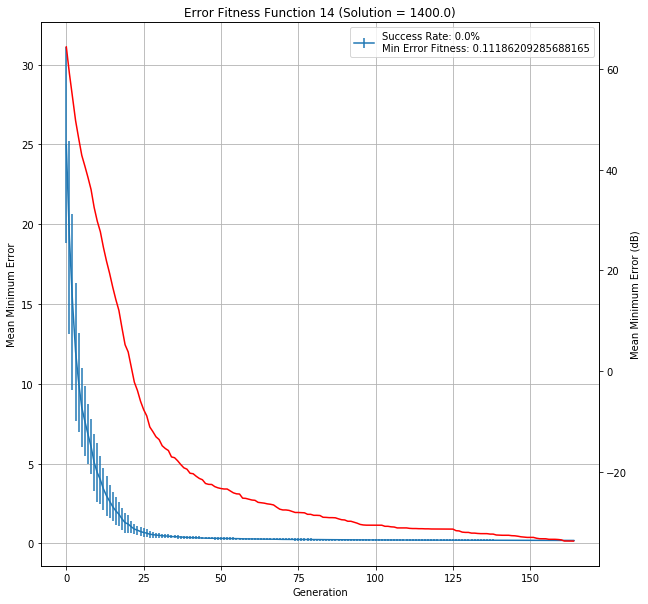

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[14_10_51_300_0.5_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,14,10,0.5,0.273184,0.13243,0.126579,0.176528,0.134227,0.215195,...,0.149511,0.155914,0.212306,0.161871,0.222183,0.202437,0.182618,0.185489,3:38:59,50100
